<a href="https://colab.research.google.com/github/emmyemmy3/emmyemmy/blob/main/Copy_of_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for Media 
#### MPATE-GE 2039 - DM-GY 9103 

---

## Homework 2 

**Instructions:**

1. Complete parts 1 through 5, filling in code in the `utils.py` and `models.py` files where indicated **# YOUR CODE HERE** or responses in `this notebook` where marked with **# YOUR RESPONSE HERE**.
2. **Document** your code. Add comments explaining what the different parts of your code are doing. 
3. If you copy code from external resources (which is fine), include references as comments.
4. When finished, commit and push this completed notebook file along with the `utils.py` file and `any other files indicated in the instructions below` to your GitHub repository corresponding to this homework.
5. IMPORTANT: do not modify any of the provided code.

**Grading:** 

- This homework is worth 10 points.
- Each function you code is worth 1 point, for a total of 7 points. 
- Each answer in part 4 is worth 1 point, for a total of 3 points.
- Points will be automatically assigned when passing tests, and manually assigned when it comes to your written responses.

**Academic integrity:**

Remember that this homework should be authored by you only. It's ok to discuss with classmates but you have to submit your own original solution.

**Reference:**

Notebook based on the companion materials of: 

<blockquote>
"Deep Learning with Python", Second Edition by  F. Chollet, 2021.
</blockquote>

You are encouraged to follow the code in `Chapter 8` from the book as help for this homework.

## Small Data, Big Challenge: Improving Models with Data Augmentation and Transfer Learning

---

In this exercise, you will improve the performance of a convolutional model trained with a small dataset of dog and cat images. Many real-world applications involve small datasets. Therefore, it's essential for you to learn how to handle small datasets effectively.

You will start by training a simple convolutional model with the limited amount of data provided. You will then observe the model's overfitting behavior and identify the need for regularization techniques such as data augmentation. You will then augment the dataset and re-train the model.

Even with data augmentation, the model may not generalize well to new data due to the limited amount of training data variability. Therefore, you will use transfer learning, where you will leverage pre-trained models to improve the performance of your model. Happy coding!

**BEFORE YOU CONTINUE:** Make sure you're using GPU acceleration.

In [ ]:
# This notebook is for visualization and written answers only
# Your code should go in utils.py and models.py
import utils as u # to use the functions from utils, do u.function()
import models as m # to use the functions from models, do m.function()

In [ ]:
# Fix the random seed for reproducibility
from numpy.random import seed
seed(123)
import tensorflow as tf
tf.keras.utils.set_random_seed(123)

## Part 1 - Organizing the data

Load the Dogs vs. Cats Small dataset, which consists of images of dogs and cats of different sizes. Check out the sizes of the different subsets (train, validation, test), and explore the data.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os

data_home = '/content/drive/My Drive/dl4m_datasets/dogs-vs-cats_small/' 
if not os.path.exists(data_home):
  print('You should download the dataset first, unzip all its folders and '
  'locate it in the data_home folder.\nFollow the instructions in the practice '
  'of our class #6.')

In [ ]:
# Create datasets

target_shape = (180, 180)
batch_size = 32

train_dataset = u.create_dataset(os.path.join(data_home, 'train'), 
                                 batch_size, target_shape)

val_dataset = u.create_dataset(os.path.join(data_home, 'validation'), 
                               batch_size, target_shape)

test_dataset = u.create_dataset(os.path.join(data_home, 'test'), 
                                batch_size, target_shape, shuffle=False)


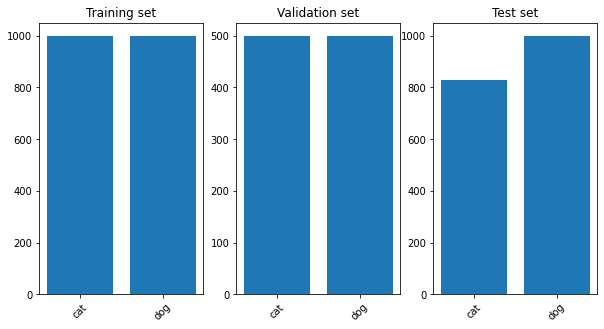

In [ ]:
# Explore the data
# WARNING: loading all the data might take a bit of time
u.explore_data(train_dataset, data_home, ['cat', 'dog'])

## Part 2 - Build, train and evaluate a baseline

Build a convolutional baseline model that classifies cats vs. dogs. Note that your model should solve a binary classification problem. 

In [ ]:
# Build baseline
input_shape = (180, 180, 3)
baseline = m.build_baseline(input_shape)

In [ ]:
baseline.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856 

In [ ]:
# Define callbacks
import keras
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="baseline.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Train model
history = baseline.fit(
              train_dataset, 
              validation_data=val_dataset,
              epochs=30, 
              batch_size=batch_size,
              callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 28s 302ms/step - loss: 0.6948 - accuracy: 0.5093 - val_loss: 0.6904 - val_accuracy: 0.5060
Epoch 2/30
63/63 [==============================] - 17s 263ms/step - loss: 0.6910 - accuracy: 0.5243 - val_loss: 0.6682 - val_accuracy: 0.5800
Epoch 3/30
63/63 [==============================] - 16s 258ms/step - loss: 0.6678 - accuracy: 0.5993 - val_loss: 0.6573 - val_accuracy: 0.6120
Epoch 4/30
63/63 [==============================] - 20s 313ms/step - loss: 0.6423 - accuracy: 0.6248 - val_loss: 0.6133 - val_accuracy: 0.6520
Epoch 5/30
63/63 [==============================] - 16s 260ms/step - loss: 0.6091 - accuracy: 0.6608 - val_loss: 0.6275 - val_accuracy: 0.6300
Epoch 6/30
63/63 [==============================] - 17s 265ms/step - loss: 0.5841 - accuracy: 0.6988 - val_loss: 0.6141 - val_accuracy: 0.6650
Epoch 7/30
63/63 [==============================] - 17s 264ms/step - loss: 0.5465 - accuracy: 0.7254 - val_loss: 0.6203 - val_accuracy: 0.6710

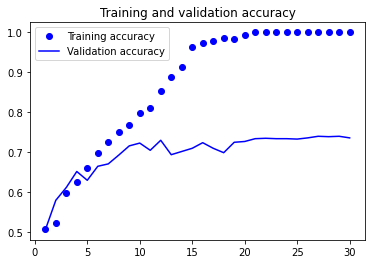

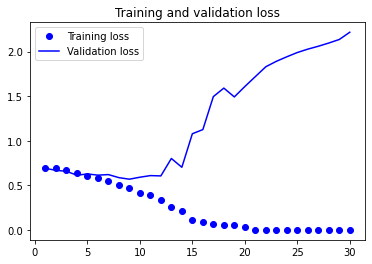

In [ ]:
u.plot_loss(history)

In [ ]:
# # Load the best checkpoint of the model
test_model = keras.models.load_model("baseline.keras")

# Evaluate model
loss, accuracy = test_model.evaluate(test_dataset)
print('Loss: %.4f, Accuracy: %.2f%%' % (loss, accuracy*100))

58/58 [==============================] - 11s 166ms/step - loss: 0.5843 - accuracy: 0.7101
Loss: 0.5843, Accuracy: 71.01%


## Part 3 - Regularize the model

Regularize the model by using data augmentation and dropout. There are many different augmentations that you can apply to the model, we will do horizontal flipping (which you will implement) and random rotation (which is already implemented). Besides data augmentation, we will include a dropout layer to further regularize the model.

In [ ]:
# Obtain the augmented datasets

train_dataset_aug = u.create_dataset(os.path.join(data_home, 'train'), 
                                 batch_size, target_shape, augment=True)

val_dataset_aug = u.create_dataset(os.path.join(data_home, 'validation'), 
                                 batch_size, target_shape, augment=True)


**Displaying some randomly augmented training images**

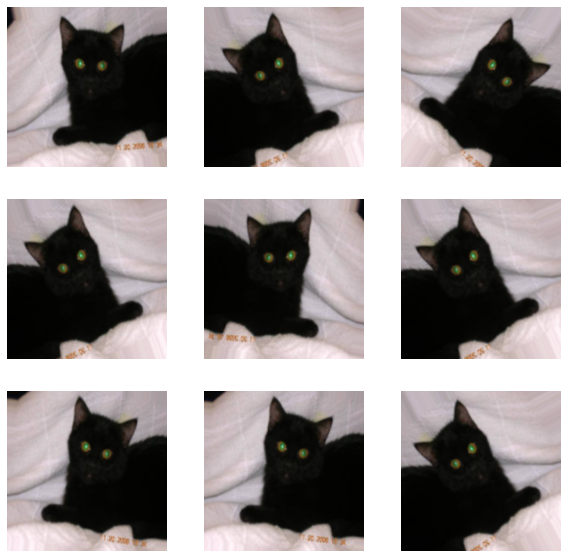

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for batch, _ in val_dataset_aug.take(1):
  for image in batch[:5]:
    # print(image.numpy().max())
    for i in range(9):
        aug_img = image.numpy()
        if np.random.rand() > 0.5:
          aug_img = u.flip_image(image.numpy())
        angle = np.random.uniform(-40, 40)
        aug_img = u.rotate_image(aug_img, angle)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(aug_img)
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
aug_model = m.build_reg_model(input_shape)

In [ ]:
aug_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 41, 41, 128)       7385

In [ ]:
# Define callbacks
import keras
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="aug_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Train model
history = aug_model.fit(
              train_dataset_aug, 
              validation_data=val_dataset_aug,
              epochs=30, 
              batch_size=batch_size,
              callbacks=callbacks)

Epoch 1/30
125/125 [==============================] - 39s 293ms/step - loss: 0.6889 - accuracy: 0.5263 - val_loss: 0.6613 - val_accuracy: 0.5745
Epoch 2/30
125/125 [==============================] - 36s 287ms/step - loss: 0.6695 - accuracy: 0.5638 - val_loss: 0.6630 - val_accuracy: 0.5970
Epoch 3/30
125/125 [==============================] - 35s 283ms/step - loss: 0.6188 - accuracy: 0.6578 - val_loss: 0.6185 - val_accuracy: 0.6730
Epoch 4/30
125/125 [==============================] - 36s 285ms/step - loss: 0.5855 - accuracy: 0.6876 - val_loss: 0.6039 - val_accuracy: 0.6830
Epoch 5/30
125/125 [==============================] - 36s 286ms/step - loss: 0.5648 - accuracy: 0.7004 - val_loss: 0.6331 - val_accuracy: 0.6685
Epoch 6/30
125/125 [==============================] - 36s 288ms/step - loss: 0.5246 - accuracy: 0.7486 - val_loss: 0.5309 - val_accuracy: 0.7335
Epoch 7/30
125/125 [==============================] - 45s 364ms/step - loss: 0.5002 - accuracy: 0.7629 - val_loss: 0.5432 - val_ac

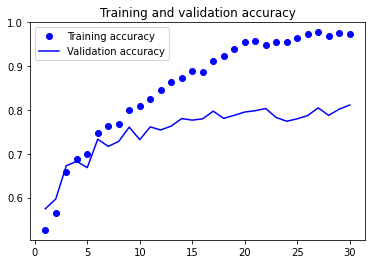

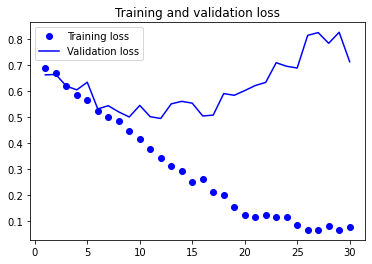

In [ ]:
u.plot_loss(history)

In [42]:
# Load the best checkpoint of the model
aug_model = keras.models.load_model("aug_model.keras")

# Evaluate model
loss, accuracy = aug_model.evaluate(test_dataset)
print('Loss: %.4f, Accuracy: %.2f%%' % (loss, accuracy*100))

58/58 [==============================] - 11s 168ms/step - loss: 120.6892 - accuracy: 0.6258
Loss: 120.6892, Accuracy: 62.58%


In [43]:
# Save predictions
import numpy as np
np.save('predictions_da.npy', aug_model.predict(test_dataset))

58/58 [==============================] - 9s 150ms/step


## Part 4 - Leveraging a pretrained model

We are going to use the VGG16 convolutional model trained with Imagenet as our pre-trained model. We will extract features from it, and use them to train a small classifier build from dense layers. 

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = m.load_conv_model()

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Extracting the VGG16 features and corresponding labels**

In [ ]:
# Create datasets

train_dataset = u.create_dataset(os.path.join(data_home, 'train'), 
                                 batch_size, target_shape, normalize=False)

val_dataset = u.create_dataset(os.path.join(data_home, 'validation'), 
                               batch_size, target_shape, normalize=False)

test_dataset = u.create_dataset(os.path.join(data_home, 'test'), 
                                batch_size, target_shape, 
                                shuffle=False, normalize=False)


In [ ]:
import numpy as np

train_features, train_labels =  u.get_features_and_labels(train_dataset, conv_base)
val_features, val_labels =  u.get_features_and_labels(val_dataset, conv_base)
test_features, test_labels =  u.get_features_and_labels(test_dataset, conv_base)

1/1 [==============================] - 1s 831ms/step


In [ ]:
train_features.shape

(1999, 5, 5, 512)

**Defining and training the densely connected classifier**

In [ ]:
dense_model = m.build_dense_model(input_shape=train_features.shape[1:])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = dense_model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 1.7189 - accuracy: 0.9070 - val_loss: 0.3803 - val_accuracy: 0.9700
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 0.4829 - accuracy: 0.9745 - val_loss: 0.4103 - val_accuracy: 0.9710
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 0.2160 - accuracy: 0.9800 - val_loss: 0.5622 - val_accuracy: 0.9690
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 0.3711 - accuracy: 0.9750 - val_loss: 0.4988 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.1333 - accuracy: 0.9870 - val_loss: 0.6422 - val_accuracy: 0.9670
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.2465 - accuracy: 0.9880 - val_loss: 0.5594 - val_accuracy: 0.9750
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.0680 - accuracy: 0.9920 - val_loss: 0.7280 - val_accuracy: 0.9690
Epoch 8/20
63/63 [=

**Plotting the results**

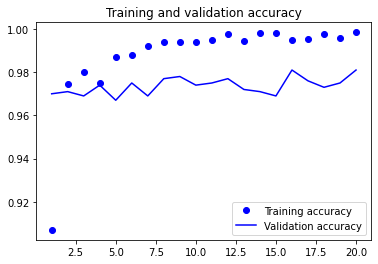

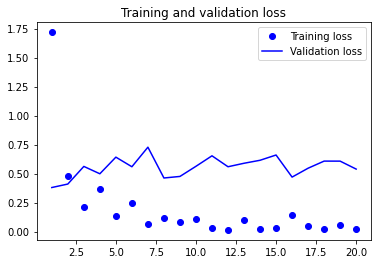

In [ ]:
u.plot_loss(history)

In [44]:
# Load the best checkpoint of the model
transf_model = keras.models.load_model("feature_extraction.keras")

# Evaluate model
loss, accuracy = transf_model.evaluate(test_features, test_labels)
print('Loss: %.4f, Accuracy: %.2f%%' % (loss, accuracy*100))

58/58 [==============================] - 0s 4ms/step - loss: 0.5489 - accuracy: 0.9655
Loss: 0.5489, Accuracy: 96.55%


In [45]:
# Save predictions
np.save('predictions_tl.npy', transf_model.predict(test_features))

58/58 [==============================] - 0s 2ms/step


## Part 5 - Discuss the problem

1. What is overfitting, and how does it affect the performance of a model trained on a small dataset? Provide an example.

2. What are the benefits of data augmentation in improving the performance of a model trained on a small dataset? Provide an example of a data augmentation technique that could be used in this exercise other than flipping and rotation.

3. What is transfer learning, and how can it be used to improve the performance of a model trained on a small dataset? Provide an example of a pre-trained model that could be used in this exercise beyond VGG16.

4. What problems are you interested in which you think that transfer learning might be useful and why?

`# YOUR RESPONSES HERE`